In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [ ]:
df1 = pd.read_csv("/content/data_kaggle (1).csv")
df1.head()

,Location,Price,Rooms,Bathrooms,Car Parks,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,2.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,NaN,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,2.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,2.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
df1.shape

(18972, 8)

In [ ]:
df1.groupby('Property Type') ['Property Type'].agg ('count')

Property Type
1-sty Terrace/Link House                    53
1-sty Terrace/Link House (Corner)           36
1-sty Terrace/Link House (EndLot)           12
1-sty Terrace/Link House (Intermediate)    226
1.5-sty Terrace/Link House                  15
                                          ... 
Townhouse                                   57
Townhouse (Corner)                          10
Townhouse (Duplex)                           1
Townhouse (EndLot)                          18
Townhouse (Intermediate)                   110
Name: Property Type, Length: 83, dtype: int64

In [ ]:
df2=df1.drop(['Car Parks'],axis='columns')
df2.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,Serviced Residence,"Built-up : 1,335 sq. ft.",Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,Bungalow,Land area : 6900 sq. ft.,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,Condominium (Corner),"Built-up : 1,875 sq. ft.",Partly Furnished
3,"Cheras, Kuala Lumpur",NaN,NaN,NaN,NaN,NaN,NaN
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,Condominium (Corner),"Built-up : 1,513 sq. ft.",Partly Furnished


In [ ]:
df2.isnull().sum()

Location            0
Price              92
Rooms             550
Bathrooms         623
Property Type      25
Size              357
Furnishing       2109
dtype: int64

In [ ]:
df3 = df2.dropna()
df3.isnull().sum()

Location         0
Price            0
Rooms            0
Bathrooms        0
Property Type    0
Size             0
Furnishing       0
dtype: int64

In [ ]:
df3['Rooms'].unique()

array(['2+1', '6', '3', '4+1', '4+2', '5', '4', '3+1', '6+1', '5+1',
       '3+2', '1', '2', '1+1', '2+2', '7+1', '5+2', 'Studio', '7', '6+',
       '14', '12', '8', '7+', '8+', '8+1', '13+', '20 Above', '10', '1+2',
       '9', '10+1', '15+', '9+1', '10+'], dtype=object)

In [ ]:
df3.Size.unique()

array(['Built-up : 1,335 sq. ft.', 'Land area : 6900 sq. ft.',
       'Built-up : 1,875 sq. ft.', ..., 'Land area : 1119 sq. ft.',
       'Built-up : 3,917 sq. ft.', 'Land area : 9791 sq. ft.'],
      dtype=object)

In [ ]:
import re
def extract_size(size_str):
    # Use regular expression to find the numerical part
    match = re.search(r'(\d[\d,]*) sq\. ft\.', size_str)
    if match:
        # Remove commas and convert to integer
        return int(match.group(1).replace(',', ''))
    return None

# Apply the function to the Size column
df3['Size'] = df3['Size'].apply(extract_size)

# Show the dataframe to verify the changes
print(df3)

                                              Location         Price Rooms  \
0                                   KLCC, Kuala Lumpur  RM 1,250,000   2+1   
1                      Damansara Heights, Kuala Lumpur  RM 6,800,000     6   
2                                Dutamas, Kuala Lumpur  RM 1,030,000     3   
4                            Bukit Jalil, Kuala Lumpur    RM 900,000   4+1   
5                    Taman Tun Dr Ismail, Kuala Lumpur  RM 5,350,000   4+2   
...                                                ...           ...   ...   
18966                         Taman Desa, Kuala Lumpur  RM 1,600,000     4   
18967                             Ampang, Kuala Lumpur  RM 1,650,000     6   
18968                               KLCC, Kuala Lumpur  RM 1,580,000     2   
18969  Jalan Klang Lama (Old Klang Road), Kuala Lumpur  RM 3,600,000   6+1   
18970                        Setiawangsa, Kuala Lumpur  RM 2,100,000     5   

       Bathrooms                              Property Type    

<ipython-input-12-48aa64b3500c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Size'] = df3['Size'].apply(extract_size)


In [ ]:
df3.Size.unique()

array([1335., 6900., 1875., ..., 8676., 3917., 9791.])

In [ ]:
df3.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",2+1,3.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,Condominium (Corner),1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",4+1,3.0,Condominium (Corner),1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",4+2,5.0,Bungalow,7200.0,Partly Furnished


In [ ]:
def clean_rooms(rooms_str):
    if isinstance(rooms_str, str):
        if '+' in rooms_str:
            # Split the string by '+' and sum the parts
            parts = rooms_str.split('+')
            try:
                return sum(int(part) for part in parts)
            except ValueError:
                return None  # Handle cases where conversion fails
        else:
            try:
                return int(rooms_str)
            except ValueError:
                return None  # Handle cases where conversion fails
    return None

# Apply the function to the Rooms column
df3['Rooms'] = df3['Rooms'].apply(clean_rooms)

# Drop rows where 'Rooms' could not be converted (optional)
df3 = df3.dropna(subset=['Rooms'])

# Ensure 'Rooms' column is of integer type
df3['Rooms'] = df3['Rooms'].astype(int)

# Show the dataframe to verify the changes
print(df3.dtypes)

Location          object
Price             object
Rooms              int64
Bathrooms        float64
Property Type     object
Size             float64
Furnishing        object
dtype: object


<ipython-input-15-70f8a34d587e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rooms'] = df3['Rooms'].apply(clean_rooms)
<ipython-input-15-70f8a34d587e>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rooms'] = df3['Rooms'].astype(int)


In [ ]:
df3.head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,"KLCC, Kuala Lumpur","RM 1,250,000",3,3.0,Serviced Residence,1335.0,Fully Furnished
1,"Damansara Heights, Kuala Lumpur","RM 6,800,000",6,7.0,Bungalow,6900.0,Partly Furnished
2,"Dutamas, Kuala Lumpur","RM 1,030,000",3,4.0,Condominium (Corner),1875.0,Partly Furnished
4,"Bukit Jalil, Kuala Lumpur","RM 900,000",5,3.0,Condominium (Corner),1513.0,Partly Furnished
5,"Taman Tun Dr Ismail, Kuala Lumpur","RM 5,350,000",6,5.0,Bungalow,7200.0,Partly Furnished


In [ ]:
# Display all column names to verify
print("Column names in df3:")
print(df3.columns)

# Display the first few rows to inspect data
print("\nFirst few rows of df3:")
print(df3.head())



Column names in df3:
Index(['Location', 'Price', 'Rooms', 'Bathrooms', 'Property Type', 'Size',
       'Furnishing'],
      dtype='object')

First few rows of df3:
                            Location         Price  Rooms  Bathrooms  \
0                 KLCC, Kuala Lumpur  RM 1,250,000      3        3.0   
1    Damansara Heights, Kuala Lumpur  RM 6,800,000      6        7.0   
2              Dutamas, Kuala Lumpur  RM 1,030,000      3        4.0   
4          Bukit Jalil, Kuala Lumpur    RM 900,000      5        3.0   
5  Taman Tun Dr Ismail, Kuala Lumpur  RM 5,350,000      6        5.0   

          Property Type    Size        Furnishing  
0    Serviced Residence  1335.0   Fully Furnished  
1              Bungalow  6900.0  Partly Furnished  
2  Condominium (Corner)  1875.0  Partly Furnished  
4  Condominium (Corner)  1513.0  Partly Furnished  
5              Bungalow  7200.0  Partly Furnished  


In [ ]:
import pandas as pd
import re

# Assuming df3 is already loaded in the notebook

# Function to convert price to numeric
def convert_price(price):
    if isinstance(price, str):
        return float(re.sub(r'[^\d.]', '', price))
    return None

# Apply the conversion function to df3
df3['Price'] = df3['Price'].apply(convert_price)

# Drop rows with missing values in 'Price' or 'Size'
df3 = df3.dropna(subset=['Price', 'Size'])

# Convert columns to int
df3['Price'] = df3['Price'].astype(int)
df3['Rooms'] = df3['Rooms'].astype(int)
df3['Bathrooms'] = df3['Bathrooms'].astype(int)
df3['Size'] = df3['Size'].astype(int)

# Check data types to confirm changes
print(df3.dtypes)

# Display the DataFrame to see the changes
print(df3)


Location         object
Price             int64
Rooms             int64
Bathrooms         int64
Property Type    object
Size              int64
Furnishing       object
dtype: object
                                              Location    Price  Rooms  \
0                                   KLCC, Kuala Lumpur  1250000      3   
1                      Damansara Heights, Kuala Lumpur  6800000      6   
2                                Dutamas, Kuala Lumpur  1030000      3   
4                            Bukit Jalil, Kuala Lumpur   900000      5   
5                    Taman Tun Dr Ismail, Kuala Lumpur  5350000      6   
...                                                ...      ...    ...   
18966                         Taman Desa, Kuala Lumpur  1600000      4   
18967                             Ampang, Kuala Lumpur  1650000      6   
18968                               KLCC, Kuala Lumpur  1580000      2   
18969  Jalan Klang Lama (Old Klang Road), Kuala Lumpur  3600000      7   
1897

<ipython-input-18-747671c327c8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Price'] = df3['Price'].astype(int)
<ipython-input-18-747671c327c8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Rooms'] = df3['Rooms'].astype(int)
<ipython-input-18-747671c327c8>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [ ]:
# Calculate price per square foot and save it in a new DataFrame df4
df4 = df3.copy()
df4['Price_per_sqft'] = df4['Price'] / df4['Size']

# Display the first few rows of df4 to verify
df4.head()


,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Price_per_sqft
0,"KLCC, Kuala Lumpur",1250000,3,3,Serviced Residence,1335,Fully Furnished,936.329588
1,"Damansara Heights, Kuala Lumpur",6800000,6,7,Bungalow,6900,Partly Furnished,985.507246
2,"Dutamas, Kuala Lumpur",1030000,3,4,Condominium (Corner),1875,Partly Furnished,549.333333
4,"Bukit Jalil, Kuala Lumpur",900000,5,3,Condominium (Corner),1513,Partly Furnished,594.844679
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,6,5,Bungalow,7200,Partly Furnished,743.055556


In [ ]:
len(df4.Location.unique())


75

In [ ]:
df4.Location = df4.Location.apply(lambda x: x.strip())
location_stats = df4.groupby('Location')['Location'].agg('count').sort_values(ascending=False)
location_stats

Location
Mont Kiara, Kuala Lumpur             1855
KLCC, Kuala Lumpur                   1562
Cheras, Kuala Lumpur                 1215
Kepong, Kuala Lumpur                  868
Bukit Jalil, Kuala Lumpur             797
                                     ... 
TAMAN MELATI, Kuala Lumpur              1
Klcc, Kuala Lumpur                      1
Kuala Lumpur                            1
Other, Kuala Lumpur                     1
ADIVA Desa ParkCity, Kuala Lumpur       1
Name: Location, Length: 75, dtype: int64

In [ ]:
len(location_stats[location_stats<=10])

20

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Location
Federal Hill, Kuala Lumpur           9
Taman Duta, Kuala Lumpur             7
Pandan Jaya, Kuala Lumpur            5
Bukit Kiara, Kuala Lumpur            4
Sungai Penchala, Kuala Lumpur        3
Happy Garden, Kuala Lumpur           1
U-THANT, Kuala Lumpur                1
Chan Sow Lin, Kuala Lumpur           1
The Mines Resort, Kuala Lumpur       1
Taman Wangsa Permai, Kuala Lumpur    1
Gombak, Kuala Lumpur                 1
Taman TAR, Kuala Lumpur              1
Seri Kembangan, Kuala Lumpur         1
SEMARAK, Kuala Lumpur                1
Alam Damai, Kuala Lumpur             1
TAMAN MELATI, Kuala Lumpur           1
Klcc, Kuala Lumpur                   1
Kuala Lumpur                         1
Other, Kuala Lumpur                  1
ADIVA Desa ParkCity, Kuala Lumpur    1
Name: Location, dtype: int64

In [ ]:
len(df4.Location.unique())

75

In [ ]:
df4.Location = df4.Location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df4.Location.unique())

56

In [ ]:
df4.head(10)

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Price_per_sqft
0,"KLCC, Kuala Lumpur",1250000,3,3,Serviced Residence,1335,Fully Furnished,936.329588
1,"Damansara Heights, Kuala Lumpur",6800000,6,7,Bungalow,6900,Partly Furnished,985.507246
2,"Dutamas, Kuala Lumpur",1030000,3,4,Condominium (Corner),1875,Partly Furnished,549.333333
4,"Bukit Jalil, Kuala Lumpur",900000,5,3,Condominium (Corner),1513,Partly Furnished,594.844679
5,"Taman Tun Dr Ismail, Kuala Lumpur",5350000,6,5,Bungalow,7200,Partly Furnished,743.055556
7,"Taman Tun Dr Ismail, Kuala Lumpur",2600000,5,4,Semi-detached House,3600,Partly Furnished,722.222222
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000,5,4,2-sty Terrace/Link House (EndLot),75,Partly Furnished,26000.000000
9,"Sri Petaling, Kuala Lumpur",385000,3,2,Apartment (Intermediate),904,Partly Furnished,425.884956
11,"Taman Tun Dr Ismail, Kuala Lumpur",1680000,4,3,2-sty Terrace/Link House (Intermediate),80,Partly Furnished,21000.000000
12,"Taman Tun Dr Ismail, Kuala Lumpur",1700000,4,3,2-sty Terrace/Link House (Intermediate),1900,Partly Furnished,894.736842


Outlier Removal

In [ ]:
df4[df4.Size/df4.Rooms<300].head()

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Price_per_sqft
8,"Taman Tun Dr Ismail, Kuala Lumpur",1950000,5,4,2-sty Terrace/Link House (EndLot),75,Partly Furnished,26000.000000
11,"Taman Tun Dr Ismail, Kuala Lumpur",1680000,4,3,2-sty Terrace/Link House (Intermediate),80,Partly Furnished,21000.000000
32,"Kepong, Kuala Lumpur",560000,3,2,2-sty Terrace/Link House (Intermediate),55,Partly Furnished,10181.818182
45,"Sungai Besi, Kuala Lumpur",900000,6,5,3-sty Terrace/Link House (Intermediate),80,Fully Furnished,11250.000000
71,"Taman Melawati, Kuala Lumpur",750000,4,3,2-sty Terrace/Link House,75,Partly Furnished,10000.000000


In [ ]:
df4.shape

(15921, 8)

In [ ]:
df5 = df4[~(df4.Size/df4.Rooms<300)]
df5.shape

(12962, 8)

In [ ]:
df5.Price_per_sqft.describe()

count     12962.000000
mean        836.385374
std        3627.574264
min           0.569620
25%         513.636364
50%         700.000000
75%         951.944744
max      410256.410256
Name: Price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('Location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10341, 8)

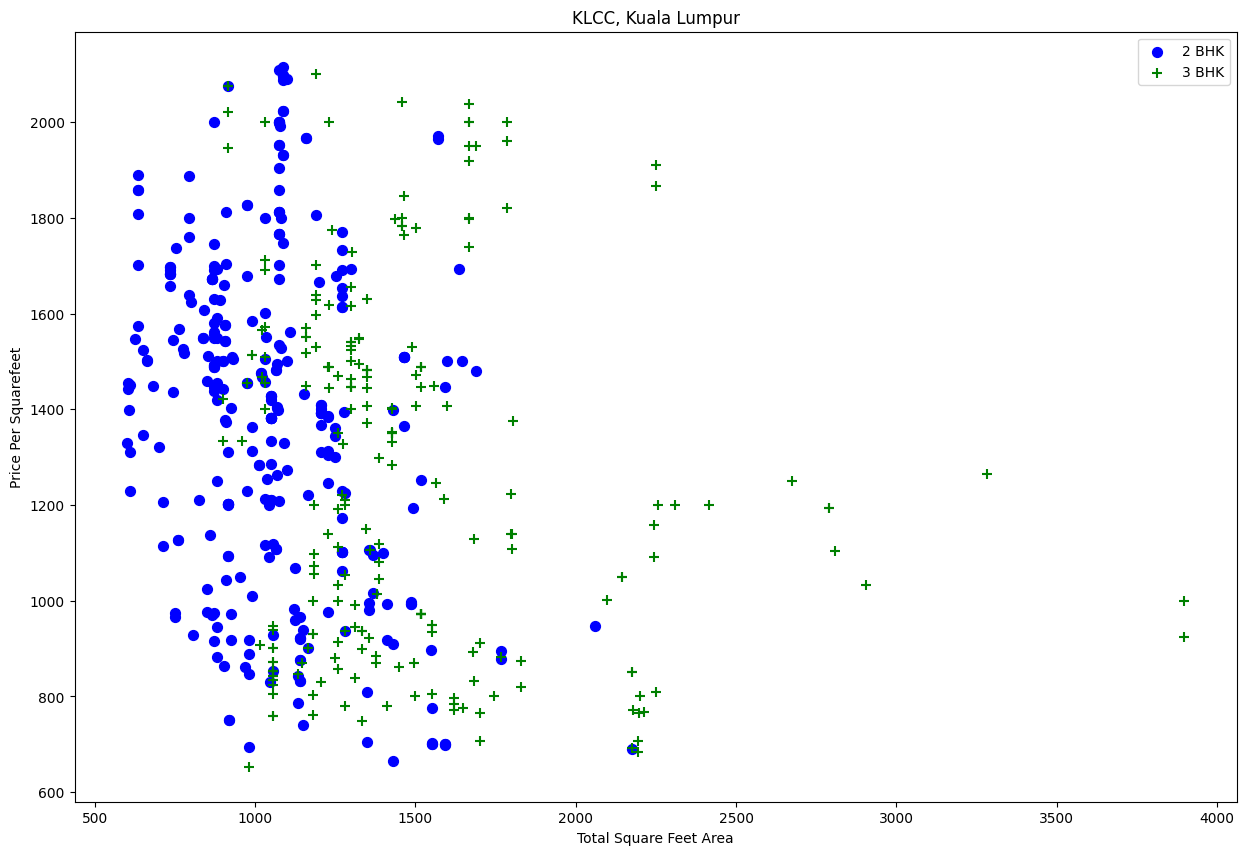

In [ ]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.Location==location) & (df.Rooms==2)]
  bhk3 = df[(df.Location==location) & (df.Rooms==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.Size,bhk2.Price_per_sqft,color='blue',label='2 BHK', s=50)
  plt.scatter(bhk3.Size,bhk3.Price_per_sqft,marker='+', color='green',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price Per Squarefeet")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df6,"KLCC, Kuala Lumpur")

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for Location, location_df in df.groupby('Location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('Rooms'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.Price_per_sqft),
          'std': np.std(bhk_df.Price_per_sqft),
          'count': bhk_df.shape[0]
      }
      for bhk, bhk_df in location_df.groupby('Rooms'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
          return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

(10341, 8)

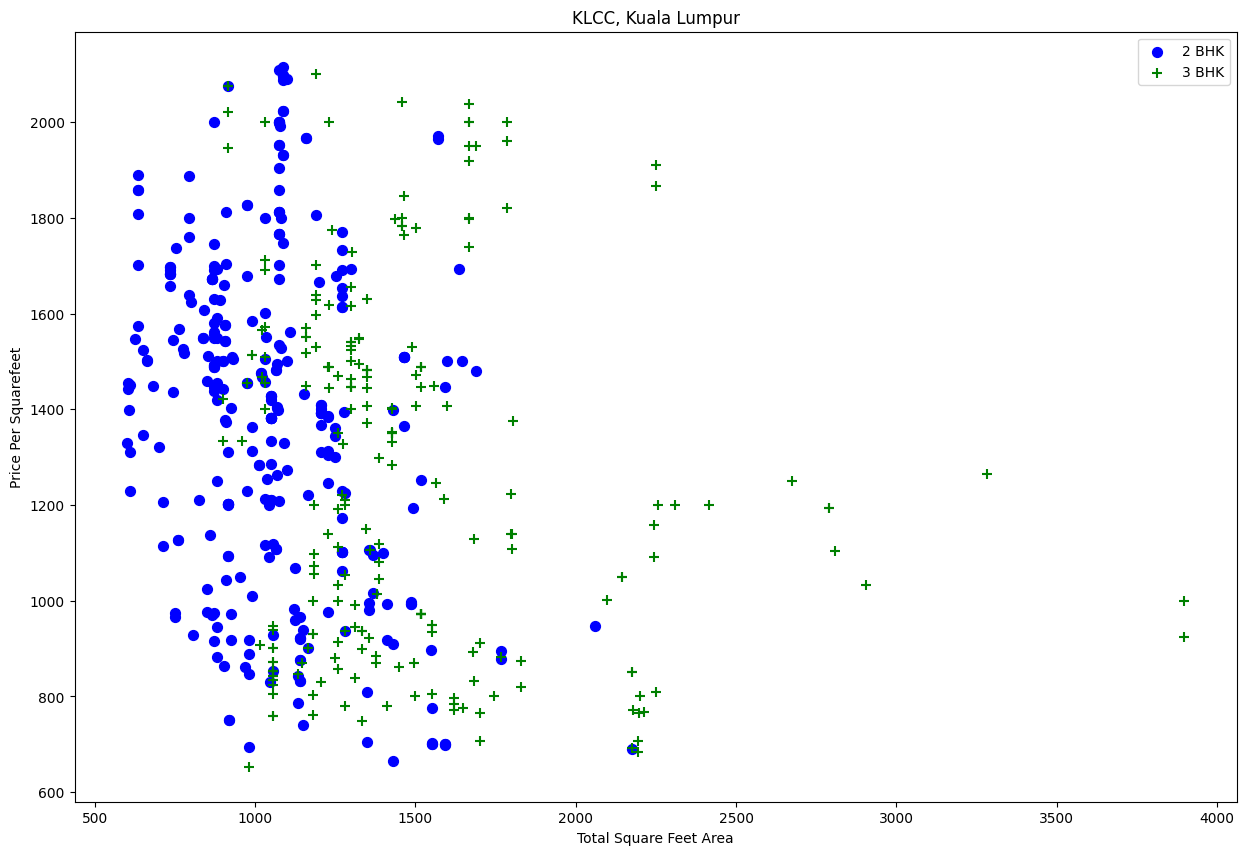

In [ ]:
plot_scatter_chart(df7,"KLCC, Kuala Lumpur")

Text(0, 0.5, 'Count')

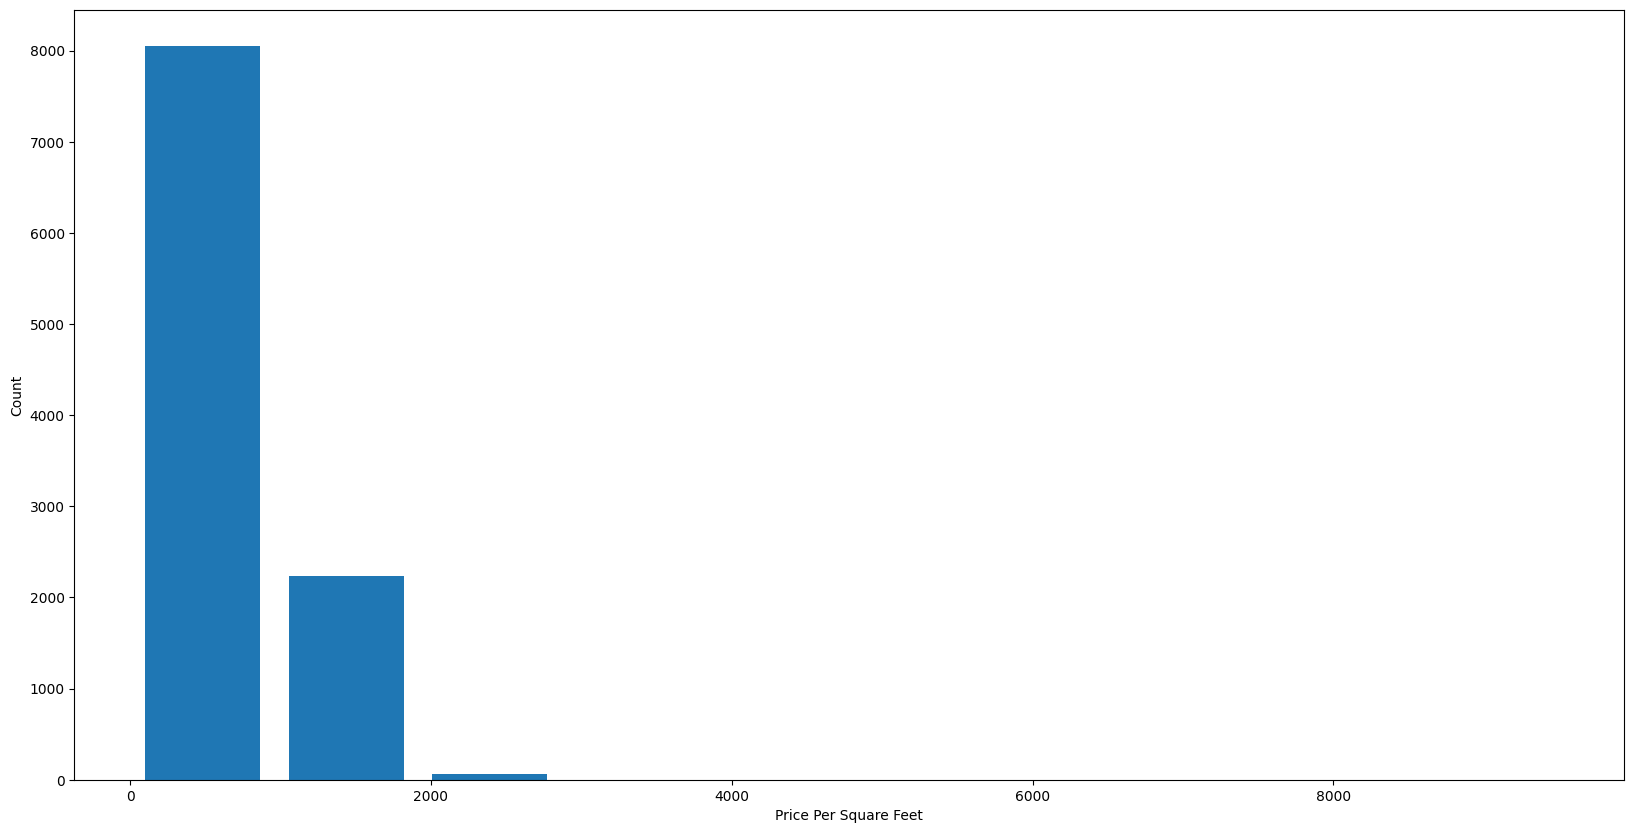

In [ ]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [ ]:
df7.Bathrooms.unique()

array([ 4,  1,  6,  5,  2,  7,  3,  8,  9, 10, 11, 12, 14, 16, 20])

In [ ]:
df7[df7.Bathrooms>10]

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Price_per_sqft
2592,"Country Heights Damansara, Kuala Lumpur",10800000,6,11,Bungalow (Intermediate),11700,Partly Furnished,923.076923
2802,"Damansara Heights, Kuala Lumpur",15500000,10,11,Bungalow (Corner),12000,Partly Furnished,1291.666667
2872,"Damansara Heights, Kuala Lumpur",22000000,8,12,Bungalow,15000,Fully Furnished,1466.666667
4347,"KL City, Kuala Lumpur",28000000,11,14,Bungalow (Corner),27000,Partly Furnished,1037.037037
4630,"KLCC, Kuala Lumpur",28000000,14,16,Bungalow,26000,Partly Furnished,1076.923077
7056,"Mont Kiara, Kuala Lumpur",1579750,3,20,Serviced Residence,1775,Partly Furnished,890.000000


Text(0, 0.5, 'Count')

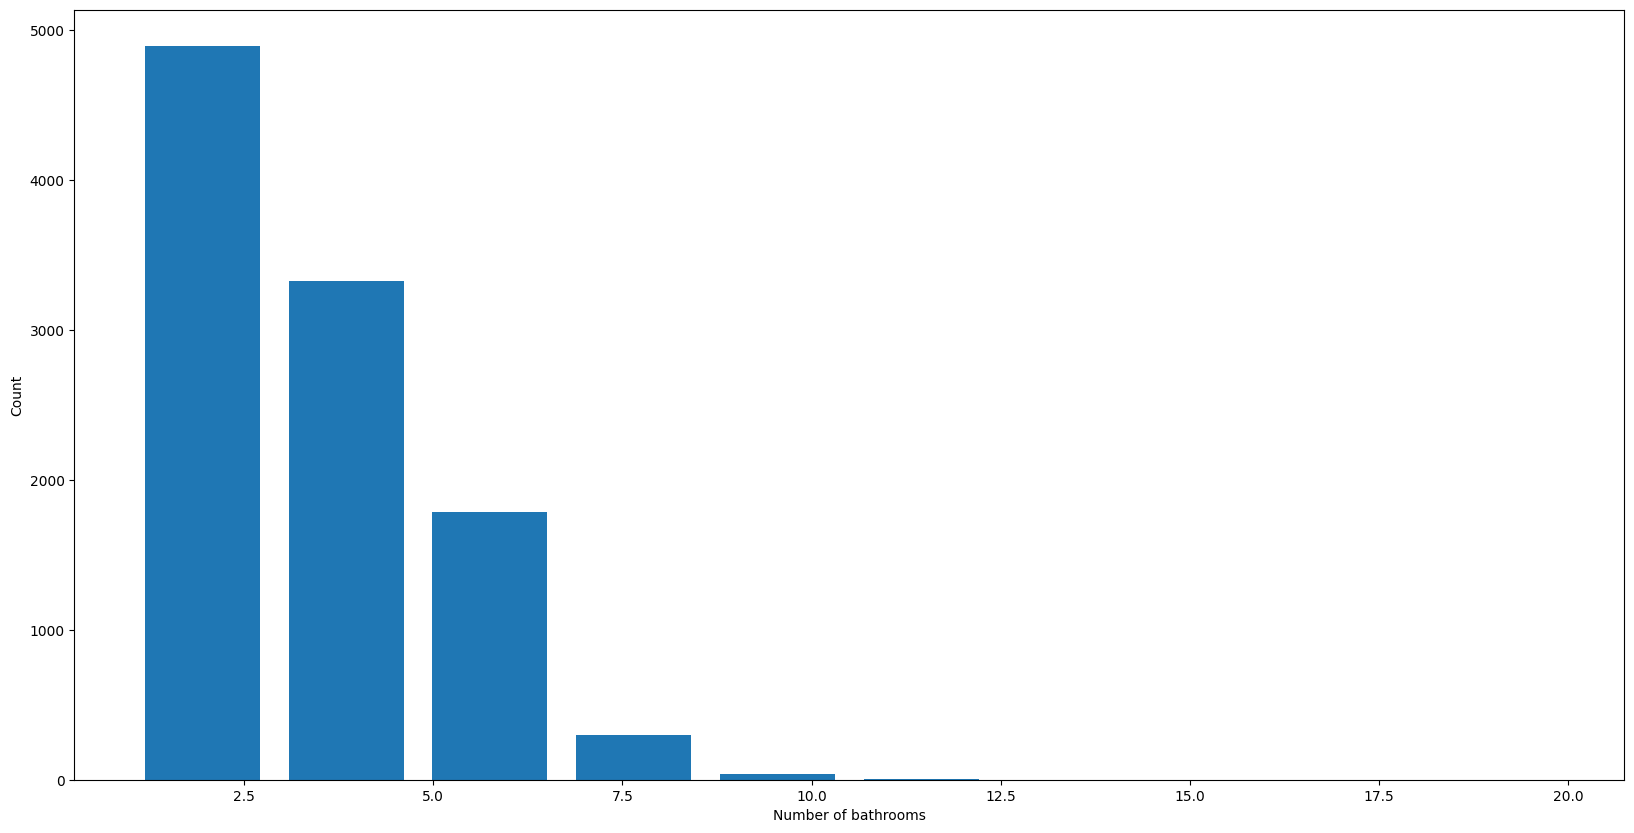

In [ ]:
plt.hist(df7.Bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df7[df7.Bathrooms>df7.Rooms+2]

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing,Price_per_sqft
2588,"Country Heights Damansara, Kuala Lumpur",9000000,7,10,Bungalow,11700,Partly Furnished,769.230769
2592,"Country Heights Damansara, Kuala Lumpur",10800000,6,11,Bungalow (Intermediate),11700,Partly Furnished,923.076923
2713,"Damansara Heights, Kuala Lumpur",6300000,7,10,Bungalow,7100,Partly Furnished,887.323944
2723,"Damansara Heights, Kuala Lumpur",12000000,6,9,Bungalow,12000,Fully Furnished,1000.000000
2872,"Damansara Heights, Kuala Lumpur",22000000,8,12,Bungalow,15000,Fully Furnished,1466.666667
4347,"KL City, Kuala Lumpur",28000000,11,14,Bungalow (Corner),27000,Partly Furnished,1037.037037
7056,"Mont Kiara, Kuala Lumpur",1579750,3,20,Serviced Residence,1775,Partly Furnished,890.000000
8000,"Mont Kiara, Kuala Lumpur",2950000,4,7,Condominium (Intermediate),3541,Fully Furnished,833.097995
10333,other,5500000,7,10,Bungalow (Intermediate),11600,Unfurnished,474.137931


In [ ]:
df8 = df7[df7.Bathrooms<df7.Rooms+2]
df8.shape

(10265, 8)

In [ ]:
df9 = df8.drop(['Price_per_sqft'],axis='columns')
df9.head(3)

,Location,Price,Rooms,Bathrooms,Property Type,Size,Furnishing
0,"Ampang Hilir, Kuala Lumpur",3300000,5,4,Condominium,3536,Unfurnished
1,"Ampang Hilir, Kuala Lumpur",460000,1,1,Serviced Residence,613,Fully Furnished
2,"Ampang Hilir, Kuala Lumpur",4800000,5,6,Condominium,4300,Partly Furnished


In [ ]:
# Rename the column in df9
df10 = df9.rename(columns={'Property Type': 'Property_Type'})
df11 = df10.drop(['Property_Type','Furnishing'],axis='columns')

# Verify the change
df11.head()
df11.shape



(10265, 5)

In [ ]:
#remove price that is less than 100,000
df11 = df11[df11['Price'] >= 100000]

# remove size that is less than 600sqft
df11 = df11[df11['Size'] >= 600]

df11.shape

(10159, 5)

Label Encoding for Categorical Column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in df11.columns:
  if df11[column].dtype == object:
    df11[column] = le.fit_transform(df11[column])
df11.head()

,Location,Price,Rooms,Bathrooms,Size
0,0,3300000,5,4,3536
1,0,460000,1,1,613
2,0,4800000,5,6,4300
3,0,3780000,5,5,3628
4,0,3710000,5,5,3369


In [ ]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10159 entries, 0 to 10340
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Location   10159 non-null  int64
 1   Price      10159 non-null  int64
 2   Rooms      10159 non-null  int64
 3   Bathrooms  10159 non-null  int64
 4   Size       10159 non-null  int64
dtypes: int64(5)
memory usage: 476.2 KB


Looking for Minimum & Maximum

In [ ]:
for i in df11.columns:
  print(i,df11[i].min(),df11[i].max())

Location 0 54
Price 145000 28000000
Rooms 1 10
Bathrooms 1 11
Size 600 108000


Corellation Heatmap

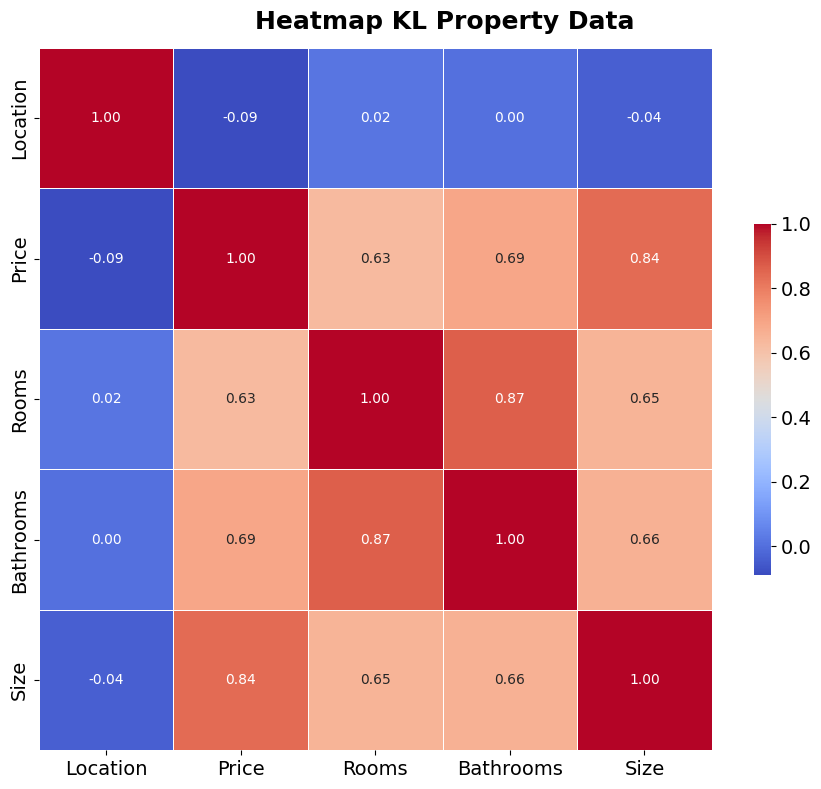

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pylab


df13 = pd.DataFrame(df11)

# Plotting the heatmap
fig = plt.figure(figsize=(9, 8))

# Update the rcParams for plot aesthetics
rcParams = {'xtick.labelsize': '14', 'ytick.labelsize': '14', 'axes.labelsize': '16'}
pylab.rcParams.update(rcParams)

# Compute the correlation matrix
corr_matrix = df13.corr()

# Generate the heatmap
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.2f', cmap='coolwarm')

# Add the title and adjust the layout
fig.suptitle('Heatmap KL Property Data', fontsize=18, fontweight="bold")
fig.tight_layout()

# Display the plot
plt.show()

# Save the figure
fig.savefig('Heatmap_Encoding', dpi=250)


Model Building

In [ ]:
df11.head()

,Location,Price,Rooms,Bathrooms,Size
0,0,3300000,5,4,3536
1,0,460000,1,1,613
2,0,4800000,5,6,4300
3,0,3780000,5,5,3628
4,0,3710000,5,5,3369


Train Test Split

In [ ]:
X =  df11.drop('Price', axis = 1)
y =  df11['Price']

In [ ]:

df11.to_csv('df11.csv', index=False)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [ ]:
print(X_train.shape, X_test.shape)



(8127, 4) (2032, 4)


Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))




Training Accuracy =  0.839713023451222
Test Accuracy     =  0.14300840299735584


Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import joblib

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

joblib.dump(dt, 'decision_tree_model.joblib')



Training Accuracy =  0.992997462401404
Test Accuracy     =  0.8056794112756916


['decision_tree_model.joblib']

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.8893175077783113
Test Accuracy     =  0.8435651332028843


Polynomial Features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.8951347049492784
Test Accuracy     =  0.8453367249370456


1.Select the final model-Decision Tree Regresor


2.Got 87.66 Accuracy


Final Model Evaluation

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [ ]:
evaluate(dt, X_train, y_train)

Average Error  = 46335.8856 degrees
Model Accuracy = 0.9930 %


In [ ]:
evaluate(dt, X_test, y_test)

Average Error  = 299377.1180 degrees
Model Accuracy = 0.8110 %


Result Visualisation

In [ ]:
pred = dt.predict(X_test)

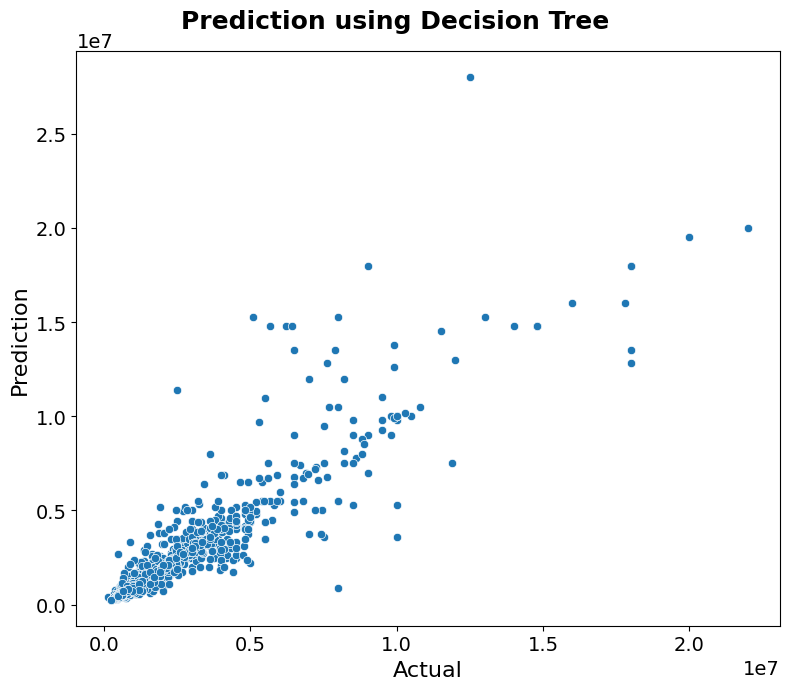

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

fig = plt.figure(figsize=(8,7))

# Create a DataFrame for Seaborn
import pandas as pd
df = pd.DataFrame({'Actual': y_test, 'Prediction': pred})

sns.scatterplot(x='Actual', y='Prediction', data=df)  # Use x and y keywords

fig.suptitle('Prediction using Decision Tree', fontsize= 18 , fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Assuming `le` and `rf` are already defined as per your code

# Sample new input data
new_data = {
    'Location': 'Ampang Hilir, Kuala Lumpur',  # Replace with actual location
    'Size': 2500,            # Replace with actual size
    'Rooms': 3,              # Replace with actual number of rooms
    'Bathrooms': 3           # Replace with actual number of bathrooms
}

# Convert the input data to a DataFrame
new_data_df = pd.DataFrame([new_data])

# Apply label encoding to the 'Location' column
# Note: The label encoder should have been fit on the original dataset
new_data_df['Location'] = le.transform(new_data_df['Location'])

# Get the feature names used during training (assuming they are stored in `rf.feature_names_in_`)
training_feature_names = dt.feature_names_in_

# Ensure the new data has the same columns as the training data (except for 'Price')
# Create the input DataFrame for prediction, using the correct order of columns
input_data = new_data_df[training_feature_names]

# Make prediction
predicted_price = dt.predict(input_data)

print("Predicted Price: ", predicted_price[0])

Predicted Price:  1900000.0


Model Deployment

In [ ]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import joblib

joblib.dump(dt, 'decision_tree_model.joblib')
joblib.dump(le, 'label_encoder.joblib')


['label_encoder.joblib']

In [ ]:
cd "C:\Users\Mohd Eydlan\house_price_prediction"

streamlit run app.py



Babel==2.15.0
Cython==3.0.10
Flask==2.2.5
GDAL==3.6.4
Markdown==3.6
MarkupSafe==2.1.5
Pillow==9.4.0
PyDrive==1.3.1
PyDrive2==1.6.3
PyOpenGL==3.1.7
PySocks==1.7.1
PyYAML==6.0.1
Pygments==2.16.1
SQLAlchemy==2.0.31
Send2Trash==1.8.3
Sphinx==5.0.2
StrEnum==0.4.15
absl-py==1.4.0
aiohttp==3.9.5
aiosignal==1.3.1
alabaster==0.7.16
albumentations==1.3.1
altair==4.2.2
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array-record==0.5.1
arviz==0.15.1
astropy==5.3.4
astunparse==1.6.3
async-timeout==4.0.3
atpublic==4.1.0
attrs==23.2.0
audioread==3.0.1
autograd==1.6.2
backcall==0.2.0
beautifulsoup4==4.12.3
bidict==0.23.1
bigframes==1.9.0
bleach==6.1.0
blis==0.7.11
blosc2==2.0.0
bokeh==3.3.4
bqplot==0.12.43
branca==0.7.2
build==1.2.1
cachecontrol==0.14.0
cachetools==5.3.3
catalogue==2.0.10
certifi==2024.6.2
cffi==1.16.0
chardet==5.2.0
charset-normalizer==3.3.2
chex==0.1.86
click==8.1.7
click-plugins==1.1.1
cligj==0.7.2
cloudpathlib==0.18.1
cloudpickle==2.2.1
cmake=